In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Amazon Sales data.csv")

In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
data.shape

(100, 14)

In [5]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=100, step=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
data["Item Type"].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

In [9]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [10]:
data["Order Date"]=pd.to_datetime(data["Order Date"])
data["Ship Date"]=pd.to_datetime(data["Ship Date"])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [12]:
data.groupby("Sales Channel").count()["Item Type"]

Sales Channel
Offline    50
Online     50
Name: Item Type, dtype: int64

In [13]:
data[data["Order Priority"]=="C"]["Item Type"].value_counts()

Item Type
Beverages          7
Clothes            4
Personal Care      2
Office Supplies    2
Vegetables         2
Cereal             1
Fruits             1
Baby Food          1
Cosmetics          1
Household          1
Name: count, dtype: int64

In [14]:
data[data["Order Priority"]=="H"]["Item Type"].value_counts()

Item Type
Cosmetics          8
Cereal             5
Baby Food          3
Vegetables         3
Clothes            3
Household          2
Fruits             2
Office Supplies    2
Personal Care      1
Beverages          1
Name: count, dtype: int64

In [15]:
data[data["Order Priority"]=="L"]["Item Type"].value_counts()

Item Type
Household          5
Fruits             5
Personal Care      4
Office Supplies    3
Clothes            3
Baby Food          2
Snacks             2
Meat               1
Cosmetics          1
Vegetables         1
Name: count, dtype: int64

In [16]:
data[data["Order Priority"]=="M"]["Item Type"].value_counts()

Item Type
Office Supplies    5
Personal Care      3
Clothes            3
Cosmetics          3
Fruits             2
Household          1
Snacks             1
Meat               1
Cereal             1
Baby Food          1
Name: count, dtype: int64

In [17]:
data.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05


In [18]:
data_sales = data.copy()

In [19]:
data_sales['Year']=data_sales["Ship Date"].dt.year

In [20]:
data_sales['Month']=data_sales["Ship Date"].dt.month

In [21]:
data_sales['Month Year']=data_sales["Ship Date"].dt.strftime('%m-%y')
data_sales['Unit Margin']=data_sales["Unit Price"]-data_sales["Unit Cost"]
data_sales['Total Sales']=data_sales["Units Sold"]*data_sales["Unit Price"]

In [22]:
data_sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Month Year,Unit Margin,Total Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,6,06-10,95.86,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,9,09-12,88.59,576782.80
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,05-14,126.25,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,7,07-14,2.41,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,02-13,126.25,3296425.02


In [23]:
Yearly_Sales = data_sales.groupby("Year").sum(numeric_only=True)

In [24]:
Yearly_Sales

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Unit Margin,Total Sales
Year,,,,,,,,,,
2010,4303754612,57468,2118.06,1325.48,16604238.53,10616258.38,5987980.15,58,792.58,16604238.53
2011,6314058760,55414,2800.47,2011.06,11459719.49,8513570.23,2946149.26,79,789.41,11459719.49
2012,13533041667,101424,8417.71,6157.19,34149877.49,24500421.12,9649456.37,136,2260.52,34149877.49
2013,5977094656,62538,3736.56,2510.72,20156772.41,13494604.87,6662167.54,81,1225.84,20156772.41
2014,8380757847,94165,3025.30,2027.93,16803890.68,10871176.50,5932714.18,110,997.37,16803890.68
2015,6112829453,49480,2706.04,1833.40,12427982.86,8431443.42,3996539.44,73,872.64,12427982.86
2016,5978208036,43156,2713.61,1744.73,12372867.22,7469029.21,4903838.01,90,968.88,12372867.22
2017,4902296205,49226,2158.38,1494.29,13373419.63,9284066.18,4089353.45,28,664.09,13373419.63


## YEARLY TRENDS ANALYSIS

In [25]:
Yearly_Sales['Total Sales'].reset_index()

,Year,Total Sales
0,2010,16604238.53
1,2011,11459719.49
2,2012,34149877.49
3,2013,20156772.41
4,2014,16803890.68
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


<Figure size 1100x600 with 0 Axes>

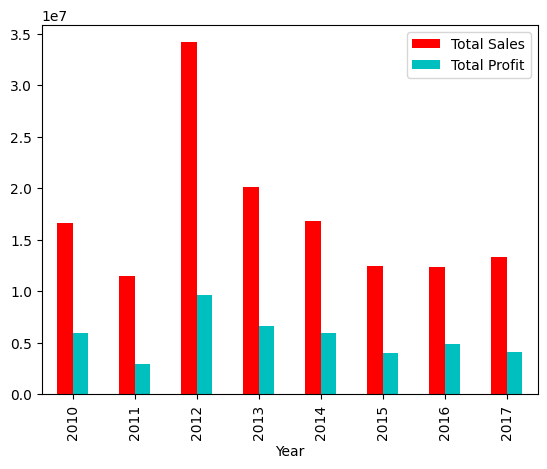

In [26]:
plt.figure(figsize=(11,6))
Yearly_Sales[['Total Sales','Total Profit']].plot(kind='bar',color=['r','c'])
plt.show()

In [27]:
Yearly_Sales_data =data_sales.groupby(['Item Type','Year']).sum(numeric_only=True)
Yearly_Sales_data=Yearly_Sales_data.sort_values('Total Sales',ascending=False)

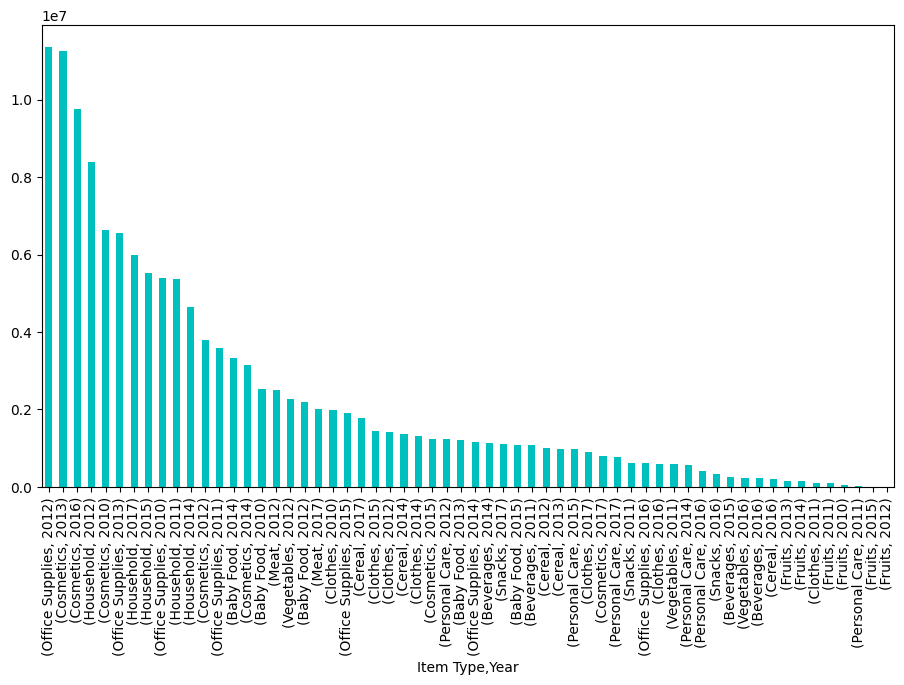

In [28]:
Yearly_Sales_data['Total Sales'].plot(kind='bar',figsize=(11,6),color='c')
plt.show()

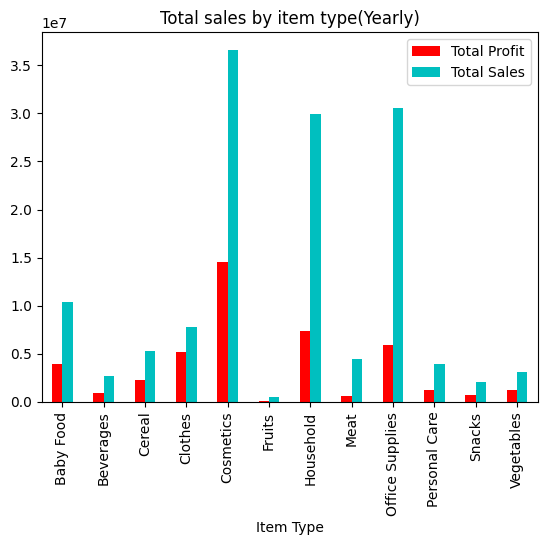

In [29]:
Yearly_Sales_data=data_sales.groupby('Item Type').sum(numeric_only=True)[['Total Profit','Total Sales']].plot(kind='bar',color=['r','c'])
plt.title("Total sales by item type(Yearly)")
plt.show()

## MONTHLY TRENDS ANALYSIS

In [30]:
data_sales['Ship Date'].dt.strftime('%b')
Monthly_Sales = data_sales.groupby('Month').sum(numeric_only=True)
Monthly_Sales['Total Sales'].reset_index()

,Month,Total Sales
0,1,8884502.45
1,2,21105331.41
2,3,11322021.69
3,4,7402746.81
4,5,11945263.42
5,6,12019913.42
6,7,6016768.51
7,8,11050846.65
8,9,4188045.51
9,10,5314762.56


In [31]:
fields=['Month']

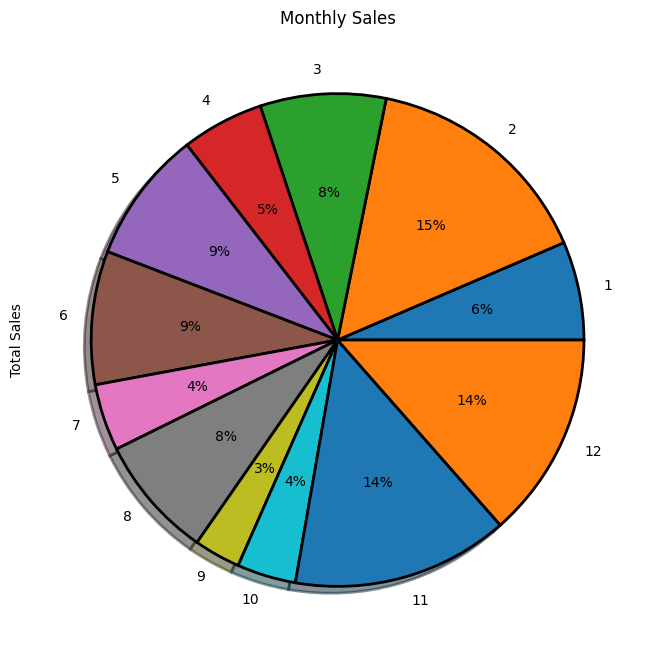

In [32]:
plt.figure(figsize=(8,8))

Monthly_Sales['Total Sales'].plot(kind='pie',autopct='%1.0f%%',figsize=(8,8),fontsize=10,textprops = {'fontsize':40},shadow = True,
                                  wedgeprops = {'linewidth':2,'width':1,'edgecolor':'k'})

plt.title('Monthly Sales')

plt.show()

In [33]:
Monthly_Sales_Data =data_sales.groupby(['Item Type','Month']).sum(numeric_only=True)
Monthly_Sales_Data =Monthly_Sales_Data.sort_values('Total Sales',ascending=False)
Monthly_Sales_Data['Total Sales'].head()

Item Type        Month
Cosmetics        12       13211309.60
Office Supplies  11       10894092.09
Household        2         9772112.21
Office Supplies  5         8789381.37
Cosmetics        8         8545511.20
Name: Total Sales, dtype: float64

<Axes: title={'center': 'Most ferquently ordered item in February'}, xlabel='Item Type'>

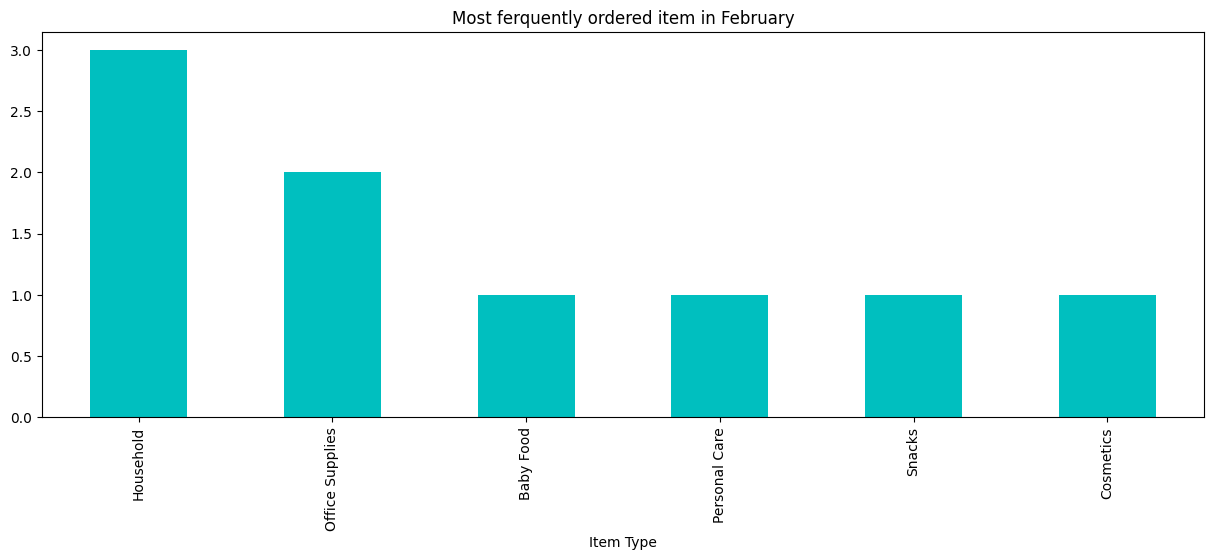

In [34]:
data_sales[data_sales['Month']==2]['Item Type'].value_counts().plot(kind='bar',color='c',
figsize=(15,5),title='Most ferquently ordered item in February')

Text(0.5, 1.0, 'Most ferquently ordered␣item in December')

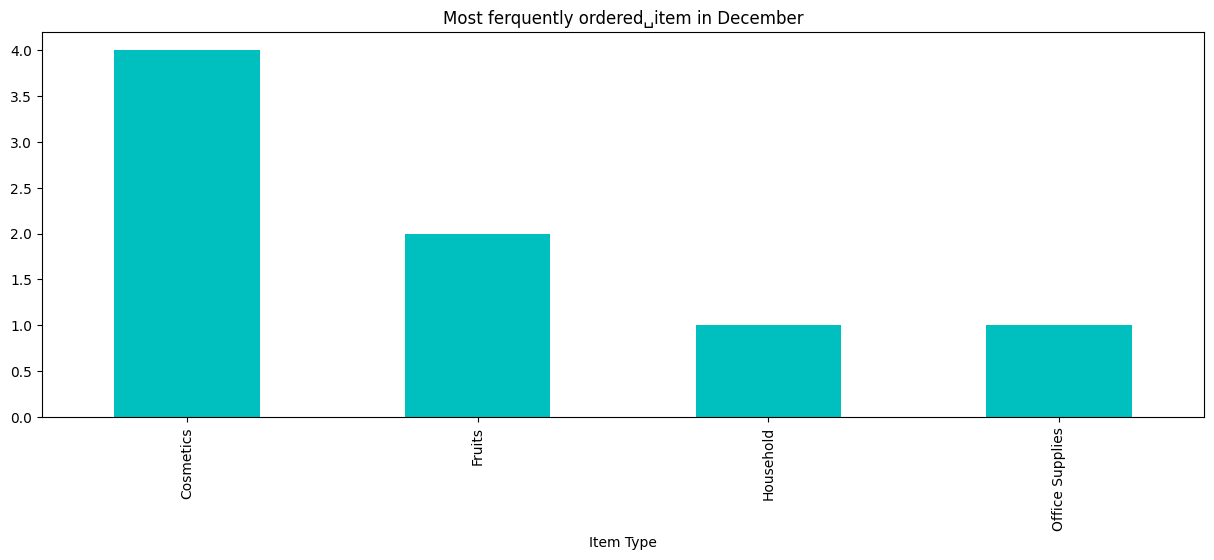

In [35]:
data_sales[data_sales['Month']==12]['Item Type'].value_counts().plot(kind='bar',color='c',figsize=(15,5))
     
plt.title('Most ferquently ordered␣item in December')

<Figure size 800x800 with 0 Axes>

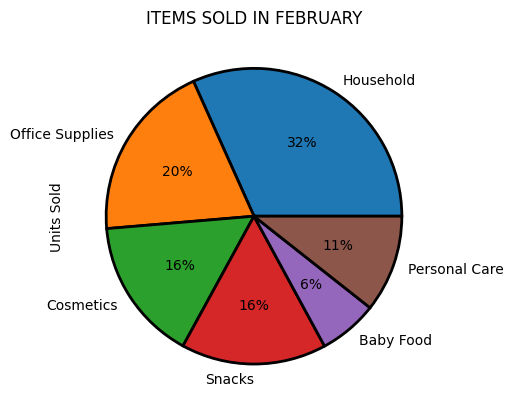

In [36]:
plt.figure(figsize=(8,8))

Monthly_Sales_Data.reset_index()[Monthly_Sales_Data.reset_index()['Month']==2].set_index('Item Type').plot(kind='pie',y='Units Sold',
                                        legend = False,autopct='%1.0f%%',wedgeprops = {'linewidth':2,'width':1,'edgecolor':'k'})

plt.title('ITEMS SOLD IN FEBRUARY')

plt.show()

<Figure size 800x800 with 0 Axes>

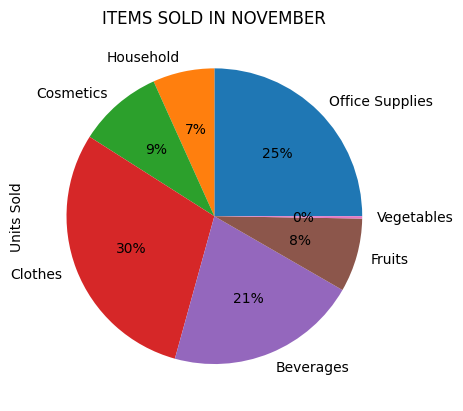

In [37]:
plt.figure(figsize=(8,8))

Monthly_Sales_Data.reset_index()[Monthly_Sales_Data.reset_index()['Month']==11].set_index('Item Type').plot(kind='pie',
                                                        y='Units Sold',legend=False,autopct='%1.0f%%')

plt.title('ITEMS SOLD IN NOVEMBER')

plt.show()

<Figure size 800x800 with 0 Axes>

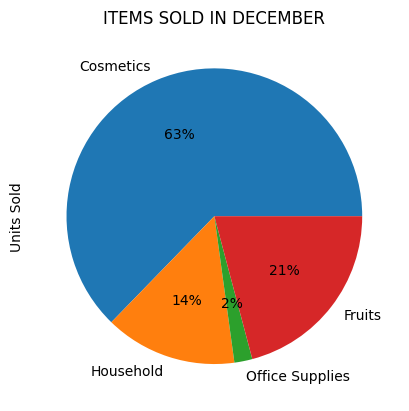

In [38]:
plt.figure(figsize=(8,8))

Monthly_Sales_Data.reset_index()[Monthly_Sales_Data.reset_index()['Month']==12].set_index('Item Type').plot(kind='pie',
                                                        y='Units Sold',legend=False,autopct='%1.0f%%')

plt.title('ITEMS SOLD IN DECEMBER')

plt.show()

## MONTH-YEARLY TREND ANALYSIS

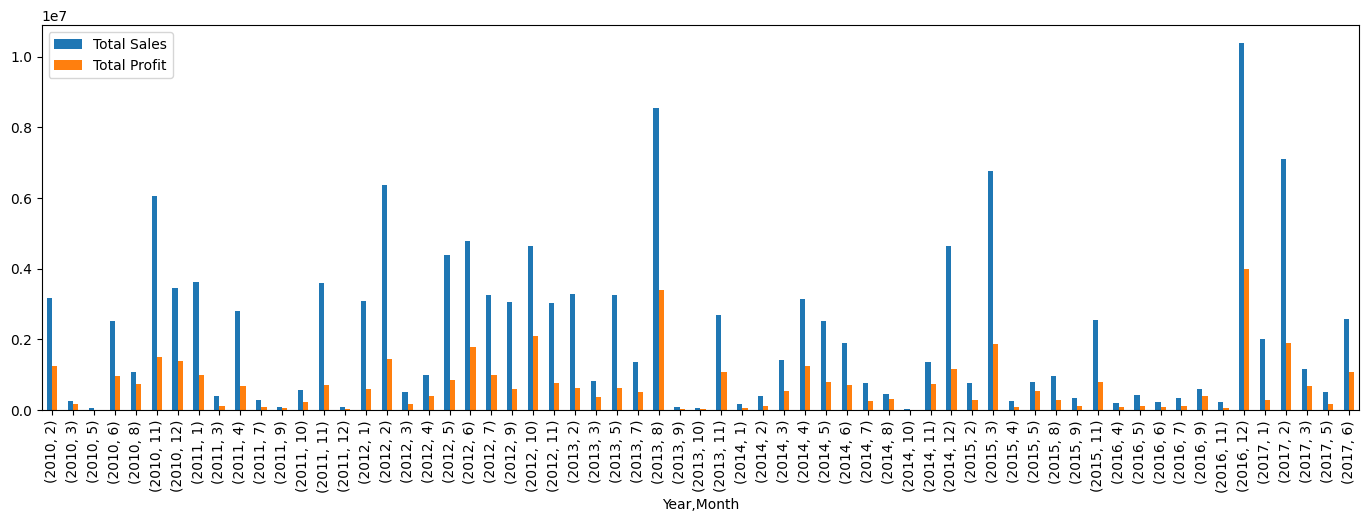

In [39]:
Data_sum =data_sales.groupby(['Year','Month']).sum(numeric_only=True)
Data_sum[['Total Sales','Total Profit']].plot(kind='bar',figsize=(17,5))
plt.show()

<Axes: xlabel='Year,Month'>

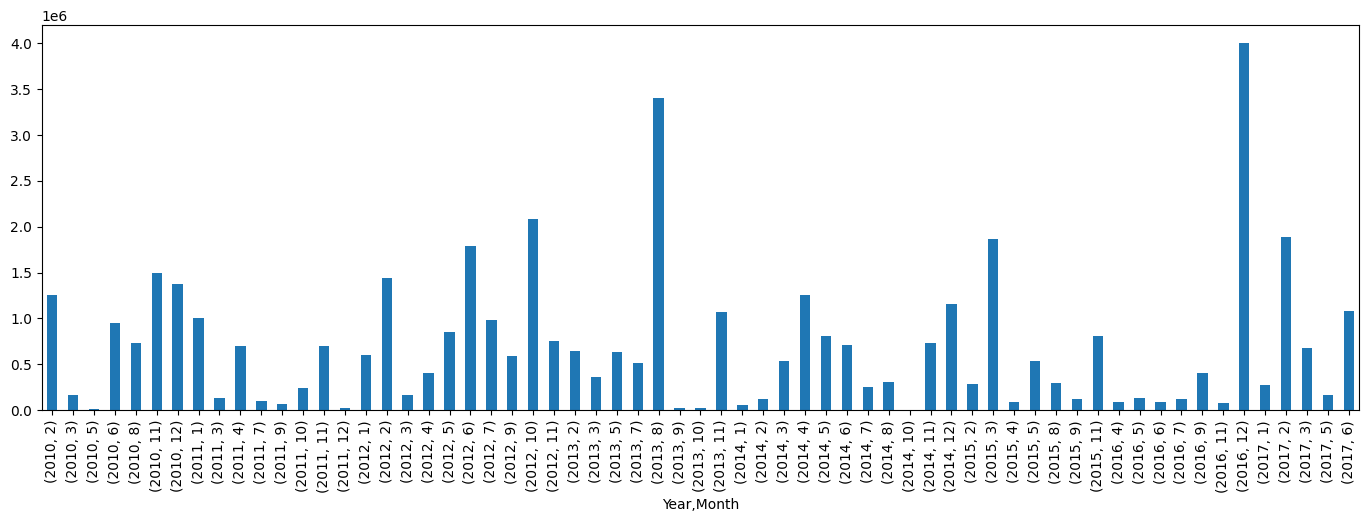

In [40]:
 Data_sum['Total Profit'].plot(kind='bar',figsize=(17,5))

In [41]:
data_region =data_sales.groupby(['Region','Country','Item Type','Year','Month']).sum(numeric_only=True)
Data_sum=data_region.reset_index()

array([<Axes: ylabel='Units Sold'>, <Axes: ylabel='Total Sales'>,
       <Axes: ylabel='Total Profit'>], dtype=object)

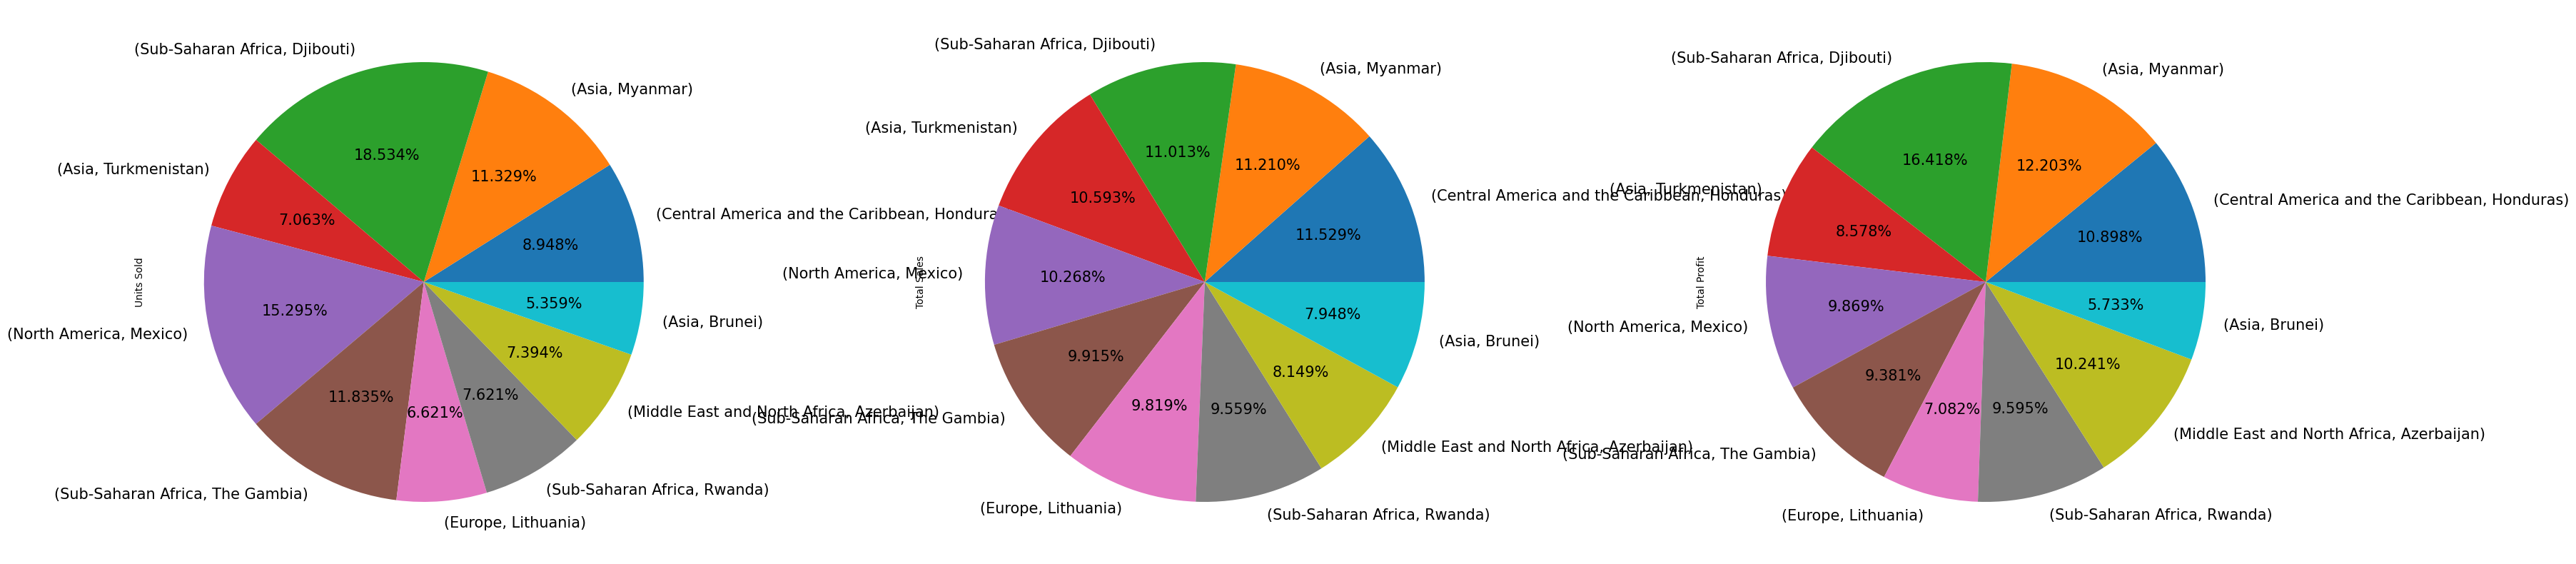

In [51]:
Data_sum.groupby(['Region','Country'])[['Units Sold','Total Sales','Total Profit']].sum().sort_values('Total Sales',ascending=False).head(10).plot(kind='pie',autopct='%0.3f%%',fontsize=15,subplots=True,legend=False,figsize=(40,10))